# **Análisis y Limpieza de Datos en Python**

Este notebook demuestra cómo generar, analizar y limpiar un conjunto de datos sintético que contiene valores nulos, atípicos e inconsistencias en texto y fechas.

Incluye técnicas de imputación de datos, tratamiento de valores atípicos, normalización y codificación de variables categóricas.


## **1. Importación de Librerías**
Para el análisis y procesamiento de los datos, utilizamos las siguientes librerías:

- `pandas`: Manejo y análisis de datos.
- `numpy`: Operaciones matemáticas y generación de datos.
- `matplotlib.pyplot` y `seaborn`: Visualización de datos.
- `scipy.stats`: Estadística para detección de valores atípicos.
- `sklearn.preprocessing`: Normalización, escalado y codificación de variables categóricas.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer


## **2. Generación del Dataset Sintético**
Creamos un conjunto de datos ficticio con:
- Variables numéricas (Edad, Salario, Experiencia, Satisfacción).
- Variables categóricas (Departamento).
- Variables de fecha (Fecha_Contratacion) en diferentes formatos.
- Introducción de valores nulos y atípicos para simular problemas reales.


In [3]:
# Generación del dataset sintético
def generar_dataset():
    np.random.seed(42)
    data = {
        'ID': range(1, 501),
        'Edad': np.random.normal(30, 10, 500).astype(int),
        'Salario': np.random.normal(50000, 15000, 500).astype(int),
        'Experiencia': np.random.randint(0, 40, 500),
        'Departamento': np.random.choice(['IT', 'HR', 'Ventas', 'Marketing'], 500),
        'Satisfacción': np.random.uniform(0, 10, 500).round(2),
        'Horas_Trabajo_Semanales': np.random.normal(40, 10, 500).astype(int),
        'Fecha_Contratacion': np.random.choice(['2023-01-25', '25/01/2023', 'Jan 25, 2023', None], 500)
    }
    df = pd.DataFrame(data)
    # Introducir valores nulos en algunas filas para demostrar métodos de imputación
    df.loc[np.random.choice(df.index, 50, replace=False), 'Edad'] = np.nan
    df.loc[np.random.choice(df.index, 25, replace=False), 'Salario'] = np.nan
    df.loc[np.random.choice(df.index, 40, replace=False), 'Fecha_Contratacion'] = None
    df.loc[np.random.choice(df.index, 30, replace=False), 'Horas_Trabajo_Semanales'] = np.nan  
    
    # Introducir valores atípicos e inconsistencias en texto
    df.loc[5, 'Salario'] = 2000000  # Un salario exageradamente alto
    df.loc[15, 'Salario'] = 1   # Un salario extremadamente bajo
    df.loc[20, 'Edad'] = 120       # Edad poco realista
    df.loc[30, 'Departamento'] = 'it'  # Inconsistencia en mayúsculas
    df.loc[40, 'Departamento'] = 'Hr'  # Otra inconsistencia
    return df

## **3. Exploración Inicial del Dataset**
Antes de proceder con la limpieza, verificamos la estructura de los datos y analizamos los valores nulos.

In [4]:
# Carga del dataset
df = generar_dataset()
original_df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       500 non-null    int64  
 1   Edad                     450 non-null    float64
 2   Salario                  475 non-null    float64
 3   Experiencia              500 non-null    int32  
 4   Departamento             500 non-null    object 
 5   Satisfacción             500 non-null    float64
 6   Horas_Trabajo_Semanales  470 non-null    float64
 7   Fecha_Contratacion       363 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 29.4+ KB


In [5]:
df.describe()

,ID,Edad,Salario,Experiencia,Satisfacción,Horas_Trabajo_Semanales
count,500.000000,450.000000,4.750000e+02,500.000000,500.000000,470.000000
mean,250.500000,29.640000,5.410054e+04,18.736000,4.937400,39.410638
std,144.481833,10.518377,9.064679e+04,11.611372,2.876064,10.015739
min,1.000000,3.000000,1.000000e+00,0.000000,0.020000,9.000000
25%,125.750000,22.250000,4.081750e+04,8.750000,2.587500,33.000000
50%,250.500000,29.000000,5.027600e+04,19.000000,4.910000,39.000000
75%,375.250000,36.000000,5.953550e+04,29.000000,7.370000,46.000000
max,500.000000,120.000000,2.000000e+06,39.000000,9.980000,71.000000


## **4. Visualización de Valores Nulos**
Usamos un mapa de calor para identificar rápidamente las columnas con valores faltantes.

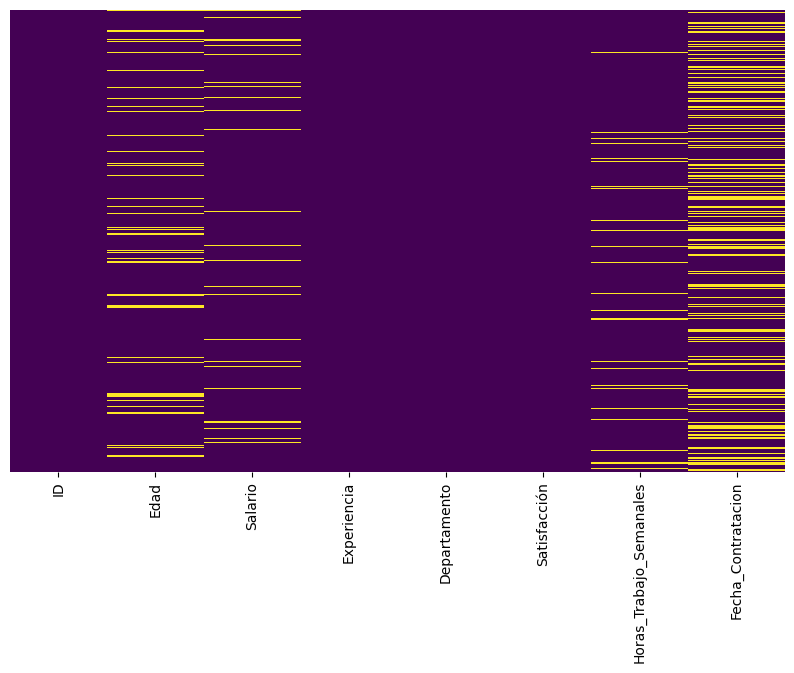

In [6]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

## **5. Manejo de Valores Nulos**

Existen diferentes formas de imputación:

- Media: Se usa cuando la distribución es aproximadamente normal.
- Mediana: Se usa cuando hay valores atípicos para evitar sesgos.
- Moda: Se usa en valores categóricos y fechas.
- KNN Imputation: Se usa para predecir los valores faltantes en función de valores similares en el conjunto de datos.
- Modelos de regresión: Se pueden entrenar modelos de regresión para predecir los valores nulos en base a otras variables.


Diferentes métodos de imputación son aplicados según el tipo de dato:
- Media para la edad.
- Mediana para el salario.
- Moda para la fecha de contratación.

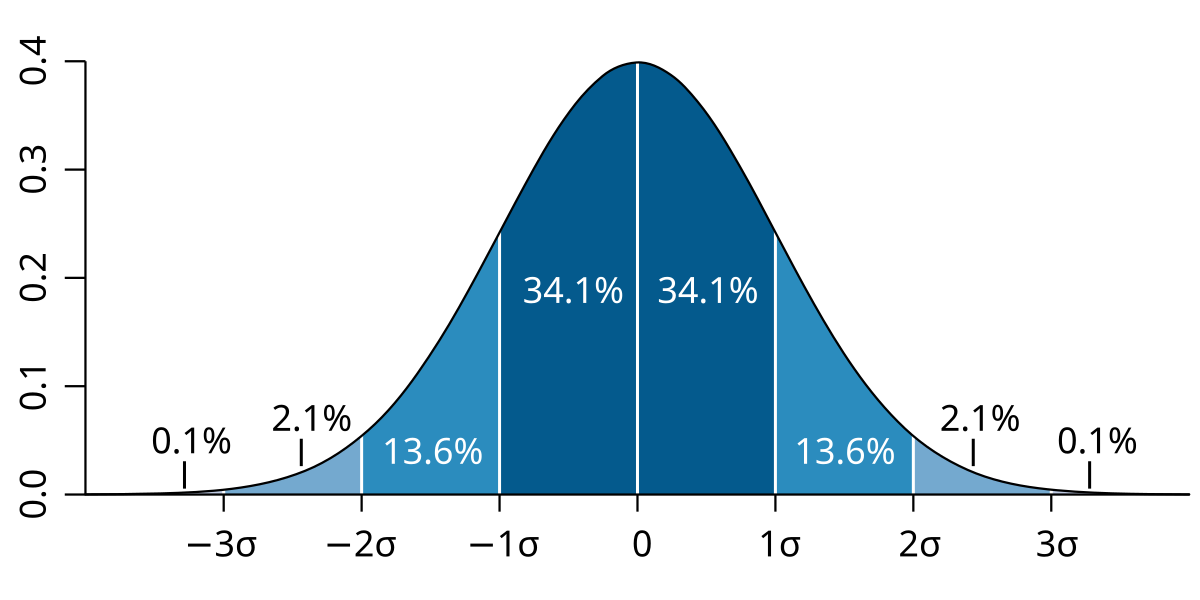

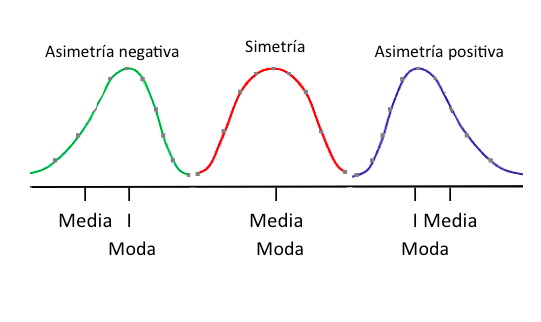

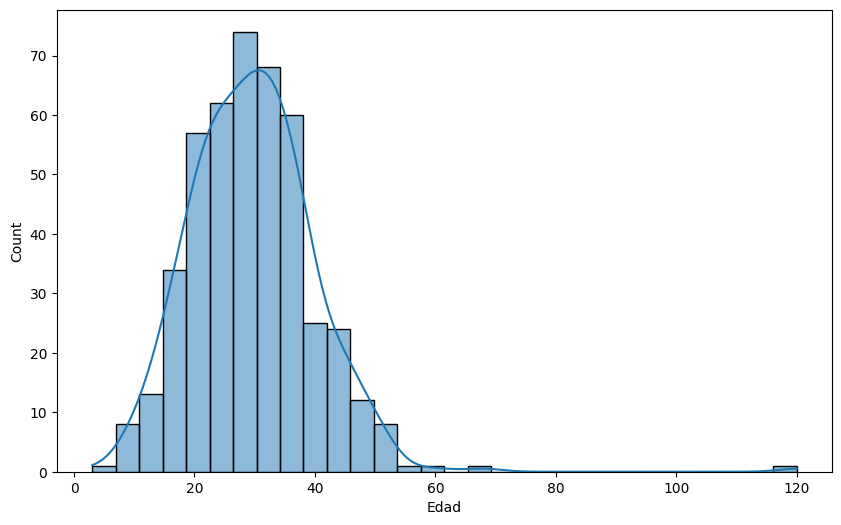

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['Edad'].dropna(), kde=True, bins=30)
plt.show()

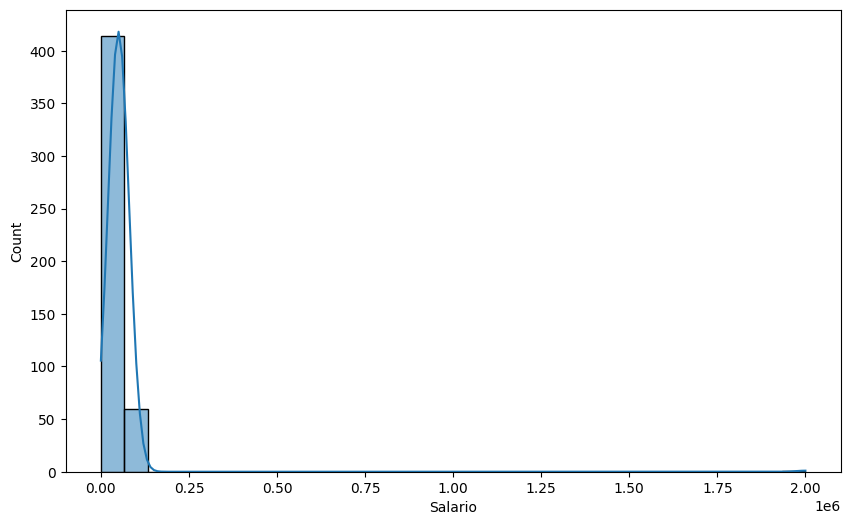

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salario'].dropna(), kde=True, bins=30)
plt.show()

In [9]:
df['Edad'] = df['Edad'].fillna(df['Edad'].mean()) ## LLenando nulos con la media
df['Salario'] = df['Salario'].fillna(df['Salario'].median()) ## LLenando nulos con la mediana


## LLenando nulos con la moda

In [10]:
df['Fecha_Contratacion'].value_counts(dropna=False)

Fecha_Contratacion
None            137
2023-01-25      128
Jan 25, 2023    120
25/01/2023      115
Name: count, dtype: int64

In [11]:
def convert_to_datetime(date_str): 
    formats = ['%Y-%m-%d', '%d/%m/%Y', '%b %d, %Y'] ## https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

In [12]:
## perdemos datos si lo hacemos de esta forma
## df['Fecha_Contratacion'] = pd.to_datetime(df['Fecha_Contratacion'], errors='coerce')

df['Fecha_Contratacion'] = df['Fecha_Contratacion'].apply(convert_to_datetime)
df['Fecha_Contratacion'].value_counts(dropna=False)

Fecha_Contratacion
2023-01-25    363
NaT           137
Name: count, dtype: int64

In [13]:
df['Fecha_Contratacion'] = df['Fecha_Contratacion'].fillna(df['Fecha_Contratacion'].mode()[0])
df['Fecha_Contratacion'].value_counts(dropna=False)

Fecha_Contratacion
2023-01-25    500
Name: count, dtype: int64

## Imputación por KNN

In [14]:
df[df.Horas_Trabajo_Semanales.isnull()]

,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion
46,47,29.64,58656.0,9,Marketing,4.58,NaN,2023-01-25
56,57,21.00,42685.0,23,HR,6.10,NaN,2023-01-25
132,133,19.00,47629.0,11,IT,1.65,NaN,2023-01-25
139,140,17.00,30573.0,1,IT,8.71,NaN,2023-01-25
144,145,32.00,46313.0,28,Ventas,0.27,NaN,2023-01-25
148,149,35.00,46535.0,36,Ventas,5.39,NaN,2023-01-25
160,161,20.00,41395.0,22,Marketing,5.78,NaN,2023-01-25
164,165,39.00,39307.0,15,IT,9.15,NaN,2023-01-25
191,192,38.00,67389.0,18,Marketing,1.66,NaN,2023-01-25
193,194,17.00,59239.0,15,Marketing,4.27,NaN,2023-01-25


In [15]:
imputer = KNNImputer(n_neighbors=5) 
df[['Horas_Trabajo_Semanales']] = imputer.fit_transform(df[['Horas_Trabajo_Semanales']])

In [16]:
df[df.Horas_Trabajo_Semanales.isnull()]

,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion


## Validar nuevamente 

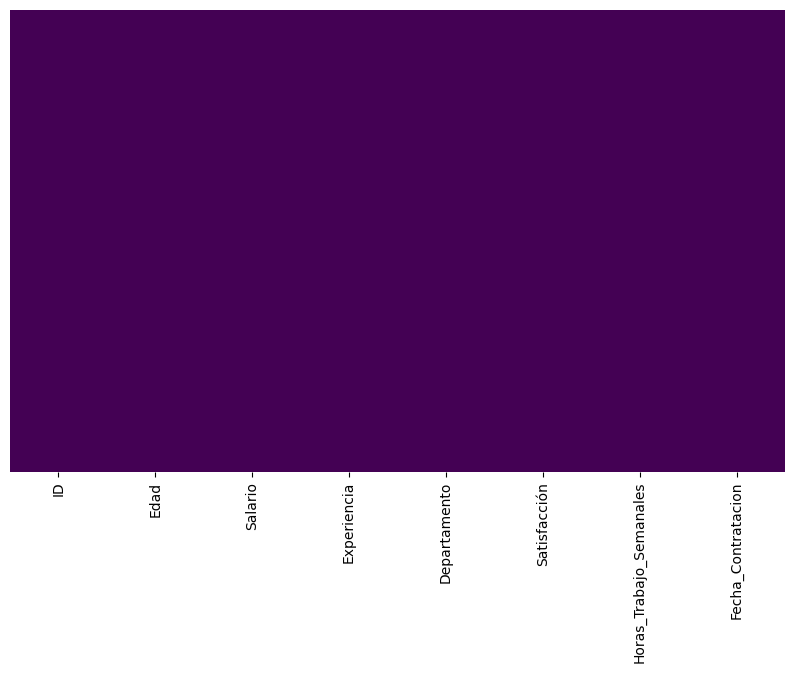

In [17]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

## **6. Corrección de Inconsistencias en Texto**
Normalizamos la columna de 'Departamento' para garantizar uniformidad.

In [18]:
df.Departamento.value_counts()

Departamento
Marketing    138
IT           128
HR           120
Ventas       112
it             1
Hr             1
Name: count, dtype: int64

In [19]:
# Normalización de datos categóricos
df['Departamento'] = df['Departamento'].str.strip().str.upper()

In [20]:
df.Departamento.value_counts()

Departamento
MARKETING    138
IT           129
HR           121
VENTAS       112
Name: count, dtype: int64

## **7. Transformación de Fechas**
Convertimos la fecha de contratación en una variable numérica (días desde 01-01-2000).

In [21]:
# Transformación de fecha
df['Dias_Desde_Contratacion'] = (df['Fecha_Contratacion'] - pd.to_datetime('2000-01-01')).dt.days

In [22]:
df.head()

,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion,Dias_Desde_Contratacion
0,1,29.64,50276.0,39,MARKETING,2.70,24.0,2023-01-25,8425
1,2,28.00,78641.0,10,VENTAS,8.25,28.0,2023-01-25,8425
2,3,36.00,29021.0,2,HR,4.98,28.0,2023-01-25,8425
3,4,45.00,58444.0,5,IT,0.77,41.0,2023-01-25,8425
4,5,27.00,40240.0,8,HR,0.59,57.0,2023-01-25,8425


## **8. Detección y Eliminación de Valores Atípicos**
Aplicamos dos métodos:
- **Rango Intercuartil (IQR)** para filtrar valores extremos en salario.
- **Z-score** para detectar edades inusuales.

In [23]:
# Detección y eliminación de valores atípicos
Q1, Q3 = df['Salario'].quantile([0.25, 0.75]) ## aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 ## se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ## se calculan los limites inferior
print(lim_inf, lim_sup)

14701.375 85864.375


In [24]:
df[(df['Salario'] < lim_inf) | (df['Salario'] > lim_sup)]


,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion,Dias_Desde_Contratacion
5,6,27.00,2000000.0,5,MARKETING,3.34,62.0,2023-01-25,8425
15,16,24.00,1.0,6,IT,2.21,47.0,2023-01-25,8425
44,45,15.00,12925.0,2,HR,1.86,22.0,2023-01-25,8425
114,115,28.00,86686.0,2,HR,4.58,40.0,2023-01-25,8425
146,147,17.00,9546.0,34,MARKETING,4.64,33.0,2023-01-25,8425
154,155,32.00,88600.0,23,HR,7.76,48.0,2023-01-25,8425
168,169,29.64,10235.0,7,HR,7.93,33.0,2023-01-25,8425
262,263,29.64,88401.0,35,MARKETING,5.47,37.0,2023-01-25,8425
347,348,15.00,86829.0,14,HR,0.46,39.0,2023-01-25,8425
477,478,33.00,13641.0,13,IT,0.28,39.0,2023-01-25,8425


In [25]:
df = df[(df['Salario'] >= lim_inf) & (df['Salario'] <= lim_sup)]


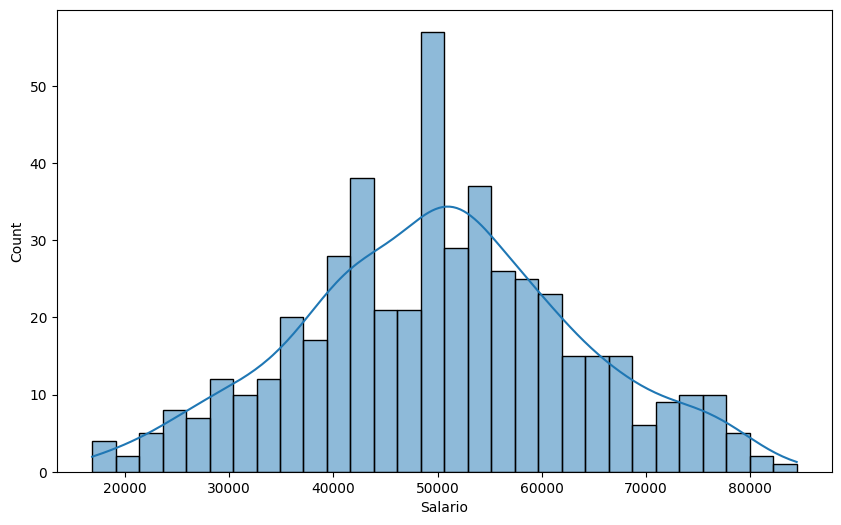

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salario'].dropna(), kde=True, bins=30)
plt.show()

## Zscore

In [27]:
df[df.Edad == 120]

,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion,Dias_Desde_Contratacion
20,21,120.0,24958.0,5,HR,6.43,14.0,2023-01-25,8425


In [28]:
z_scores = np.abs(stats.zscore(df['Edad']))
threshold = 4
outliers = df[z_scores > threshold]
outliers

,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion,Dias_Desde_Contratacion
20,21,120.0,24958.0,5,HR,6.43,14.0,2023-01-25,8425


In [29]:
df = df[(np.abs(stats.zscore(df['Edad'])) < 4)]

In [30]:
df[df.Edad == 120]

,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion,Dias_Desde_Contratacion


## **9. Normalización y Estandarización de Datos Numéricos**
Probamos dos métodos:
- **Min-Max Scaling**  Escala los valores entre 0 y 1 para que todos los datos queden en un mismo rango. se usa cuando queremos que todos los valores estén dentro de un límite definido.
- **Z-score** Normaliza los datos restando la media y dividiendo por la desviación estándar. Se usa cuando queremos que los datos tengan una distribución normal con media 0 y varianza 1.

### ¿Por qué es importante normalizar?
 imaginemos que tenemos dos grupos de estudiantes diferentes, los dos grupos están cursando la misma materia y sacaron las siguiente notas:

 | Estudiante | Curso | Nota |
|------------|-------|------|
| A1         | A     |  88  |
| A2         | A     |  78  |
| A3         | A     |  64  |
| A4         | A     |  92  |
| A5         | A     |  57  |
| A6         | A     |  70  |
| A7         | A     |  88  |
| A8         | A     |  68  |
| A9         | A     |  72  |
| A10        | A     |  60  |
| A11        | A     |  60  |
| A12        | A     |  73  |
| A13        | A     |  85  |
| A14        | A     |  89  |
| A15        | A     |  73  |
| A16        | A     |  52  |
| A17        | A     |  71  |
| A18        | A     |  51  |
| A19        | A     |  73  |
| A20        | A     |  93  |
| A21        | A     |  79  |
| A22        | A     |  87  |
| A23        | A     |  51  |
| A24        | A     |  70  |
| A25        | A     |  82  |
| A26        | A     |  61  |
| A27        | A     |  71  |
| A28        | A     |  93  |
| A29        | A     |  74  |
| A30        | A     |  98  |
| B1         | B     |  76  |
| B2         | B     |  91  |
| B3         | B     |  77  |
| B4         | B     |  65  |
| B5         | B     |  64  |
| B6         | B     |  96  |
| B7         | B     | 100  |
| B8         | B     |  93  |
| B9         | B     |  52  |
| B10        | B     |  86  |
| B11        | B     | 100  |
| B12        | B     |  56  |
| B13        | B     |  70  |
| B14        | B     |  58  |
| B15        | B     |  88  |
| B16        | B     |  67  |
| B17        | B     |  53  |
| B18        | B     |  74  |
| B19        | B     |  63  |
| B20        | B     |  99  |
| B21        | B     |  58  |
| B22        | B     |  75  |
| B23        | B     |  51  |
| B24        | B     |  69  |
| B25        | B     |  77  |
| B26        | B     |  96  |
| B27        | B     |  56  |
| B28        | B     |  93  |
| B29        | B     |  57  |
| B30        | B     |  96  |

## ¿Cuál de los dos grupos es mejor?

In [2]:
np.random.seed(42)

curso_a = np.random.randint(50, 85, 30)
curso_b = curso_a + 15
# Crear el DataFrame con las notas
df_notas = pd.DataFrame({
    "Estudiante": [f"A{i+1}" for i in range(30)] + [f"B{i+1}" for i in range(30)],
    "Curso": ["A"] * 30 + ["B"] * 30,
    "Nota": np.concatenate([curso_a, curso_b])
})

# Mostrar el DataFrame
df_notas.head()

NameError: name 'np' is not defined

C:\Users\hecto\AppData\Local\Temp\ipykernel_21476\1564056154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_notas["Curso"], y=df_notas["Nota"], palette="coolwarm")


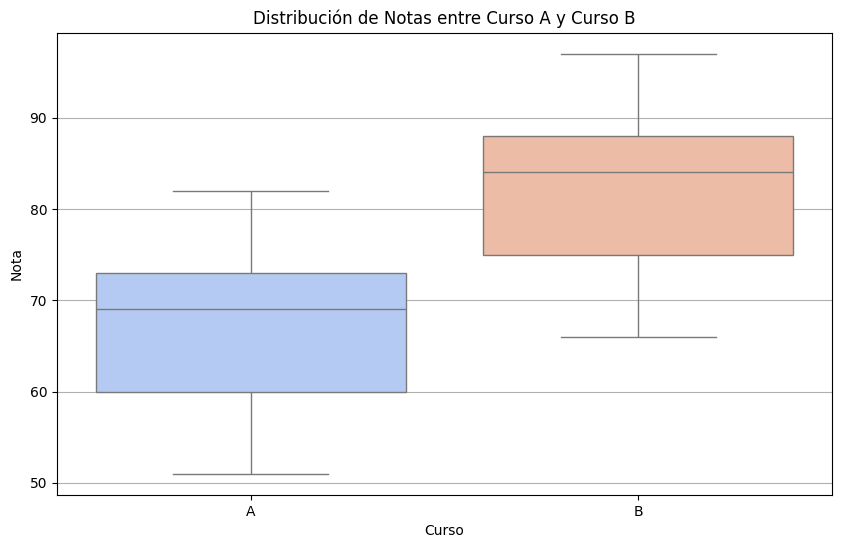

In [93]:
# Crear la figura y el eje
plt.figure(figsize=(10,6))

# Graficar el boxplot de notas por curso
sns.boxplot(x=df_notas["Curso"], y=df_notas["Nota"], palette="coolwarm")

# Configuración del gráfico
plt.xlabel("Curso")
plt.ylabel("Nota")
plt.title("Distribución de Notas entre Curso A y Curso B")
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

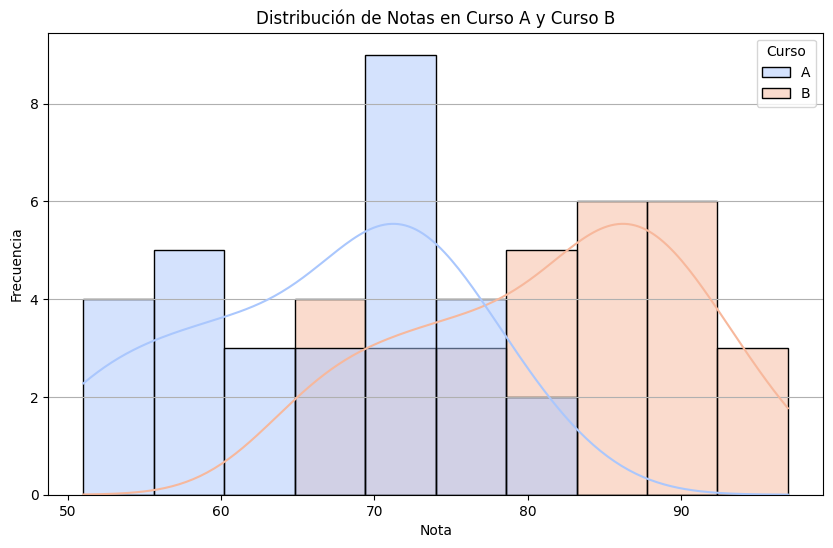

In [94]:
# Crear la figura y el eje
plt.figure(figsize=(10,6))

# Graficar el histograma de notas para ambos cursos
sns.histplot(df_notas, x="Nota", hue="Curso", kde=True, bins=10, palette="coolwarm")

# Configuración del gráfico
plt.xlabel("Nota")
plt.ylabel("Frecuencia")
plt.title("Distribución de Notas en Curso A y Curso B")
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

### Estandarizar los valores para eliminar la subjetividad 

In [95]:
from scipy.stats import zscore

df_notas["Nota_ZScore"] = df_notas.groupby("Curso")["Nota"].transform(zscore)


C:\Users\hecto\AppData\Local\Temp\ipykernel_21476\171665228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_notas["Curso"], y=df_notas["Nota_ZScore"], palette="coolwarm")


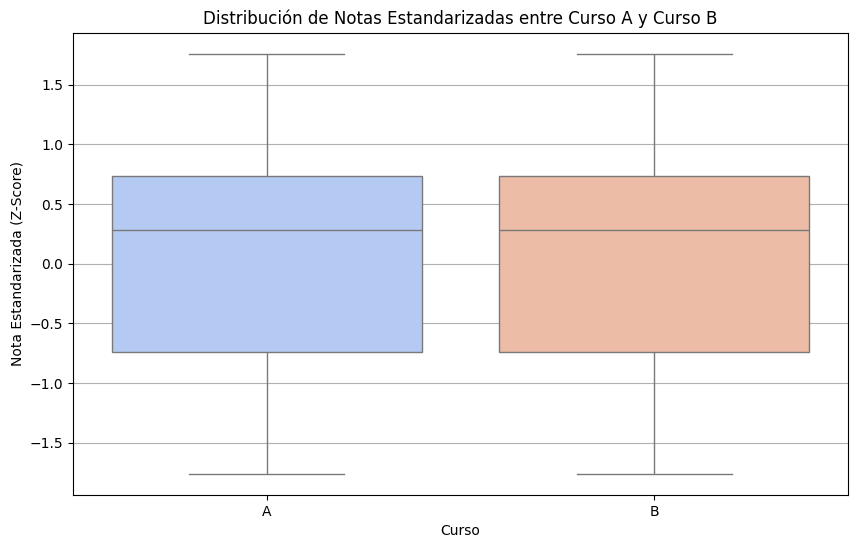

In [96]:
# Crear la figura y el eje para el boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df_notas["Curso"], y=df_notas["Nota_ZScore"], palette="coolwarm")
plt.xlabel("Curso")
plt.ylabel("Nota Estandarizada (Z-Score)")
plt.title("Distribución de Notas Estandarizadas entre Curso A y Curso B")
plt.grid(axis='y')
plt.show()

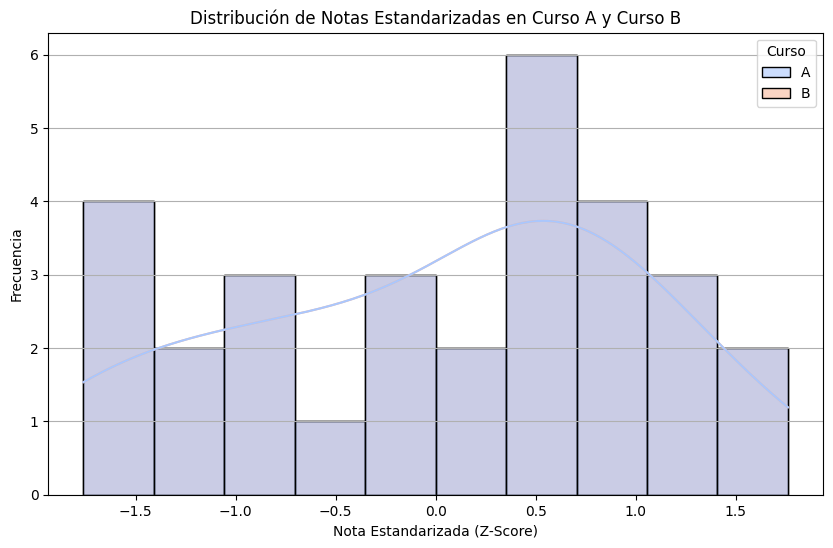

In [97]:
# Crear la figura y el eje para el histograma
plt.figure(figsize=(10,6))
sns.histplot(df_notas, x="Nota_ZScore", hue="Curso", kde=True, bins=10, palette="coolwarm", alpha=0.6)
plt.xlabel("Nota Estandarizada (Z-Score)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Notas Estandarizadas en Curso A y Curso B")
plt.grid(axis='y')
plt.show()

## volviendo a la idea principal 

In [98]:
# Normalización y estandarización de datos
scaler = MinMaxScaler()
df.loc[:, 'Edad'] = scaler.fit_transform(df[['Edad']])
df.loc[:, 'Salario'] = StandardScaler().fit_transform(df[['Salario']])

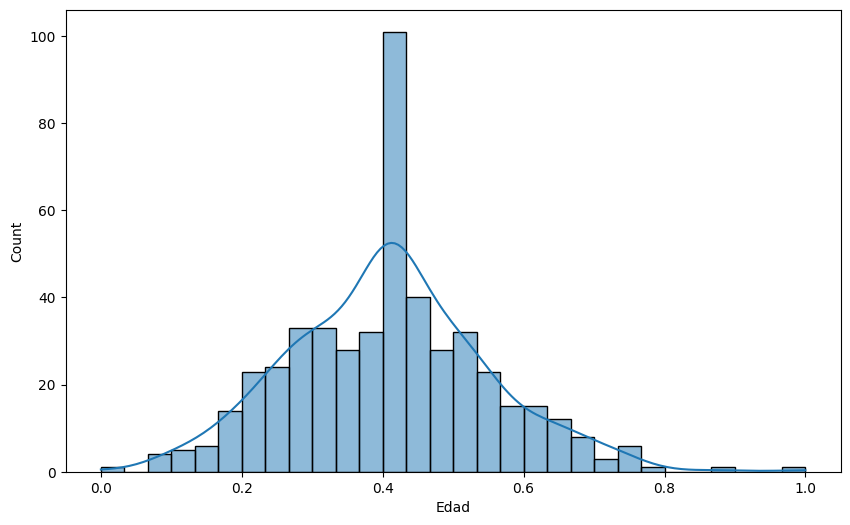

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(df['Edad'].dropna(), kde=True, bins=30)
plt.show()

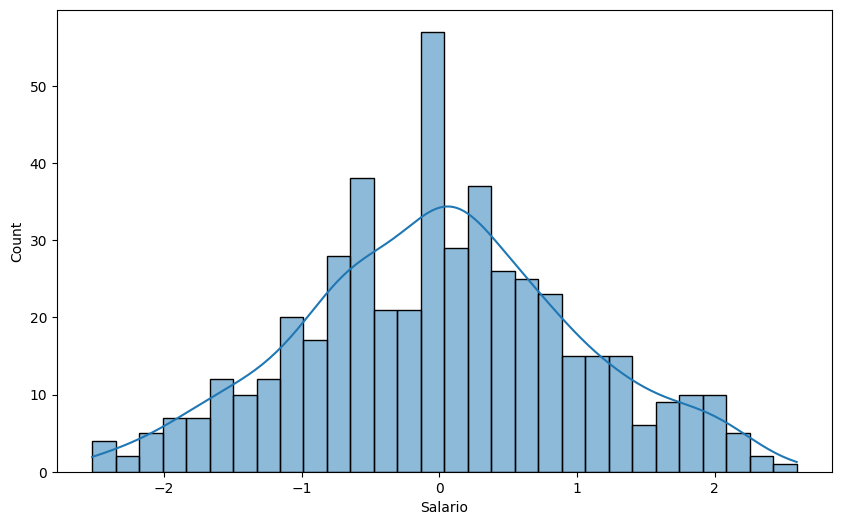

In [100]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salario'].dropna(), kde=True, bins=30)
plt.show()

## **10. Codificación de Variables Categóricas**
Usamos One-Hot Encoding para convertir 'Departamento' en variables binarias.

lo que hace esta parte es convertir una columna en varias columnas que se puede llamar columnas dummy

In [101]:
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_departments = encoder.fit_transform(df[['Departamento']])
department_columns = encoder.get_feature_names_out(['Departamento'])
encoded_df = pd.DataFrame(encoded_departments, columns=department_columns)

df = df.reset_index(drop=True).join(encoded_df)

KeyError: "None of [Index(['Departamento'], dtype='object')] are in the [columns]"

In [ ]:
df

,ID,Edad,Salario,Experiencia,Departamento,Satisfacción,Horas_Trabajo_Semanales,Fecha_Contratacion,Dias_Desde_Contratacion,Departamento_IT,Departamento_MARKETING,Departamento_VENTAS
0,1,0.409846,0.008060,39,MARKETING,2.70,24.000000,2023-01-25,8425,0.0,1.0,0.0
1,2,0.384615,2.152579,10,VENTAS,8.25,28.000000,2023-01-25,8425,0.0,0.0,1.0
2,3,0.507692,-1.598913,2,HR,4.98,28.000000,2023-01-25,8425,0.0,0.0,0.0
3,4,0.646154,0.625597,5,IT,0.77,41.000000,2023-01-25,8425,1.0,0.0,0.0
4,5,0.369231,-0.750706,8,HR,0.59,57.000000,2023-01-25,8425,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
484,496,0.492308,-0.331631,9,MARKETING,8.27,41.000000,2023-01-25,8425,0.0,1.0,0.0
485,497,0.246154,2.025866,24,HR,9.84,39.410638,2023-01-25,8425,0.0,0.0,0.0
486,498,0.384615,0.713903,1,HR,2.88,37.000000,2023-01-25,8425,0.0,0.0,0.0
487,499,0.276923,-0.660586,24,HR,9.61,56.000000,2023-01-25,8425,0.0,0.0,0.0


## Eliminar columna innecesaria y reset index


In [ ]:
df = df.drop(columns=['Departamento', 'Fecha_Contratacion'])
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,ID,Edad,Salario,Experiencia,Satisfacción,Horas_Trabajo_Semanales,Dias_Desde_Contratacion,Departamento_IT,Departamento_MARKETING,Departamento_VENTAS
0,1,0.409846,0.008060,39,2.70,24.000000,8425,0.0,1.0,0.0
1,2,0.384615,2.152579,10,8.25,28.000000,8425,0.0,0.0,1.0
2,3,0.507692,-1.598913,2,4.98,28.000000,8425,0.0,0.0,0.0
3,4,0.646154,0.625597,5,0.77,41.000000,8425,1.0,0.0,0.0
4,5,0.369231,-0.750706,8,0.59,57.000000,8425,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
484,496,0.492308,-0.331631,9,8.27,41.000000,8425,0.0,1.0,0.0
485,497,0.246154,2.025866,24,9.84,39.410638,8425,0.0,0.0,0.0
486,498,0.384615,0.713903,1,2.88,37.000000,8425,0.0,0.0,0.0
487,499,0.276923,-0.660586,24,9.61,56.000000,8425,0.0,0.0,0.0


## Ejercicio, implementemos lo mismo, para el data set llamado "dataset_vehiculos.csv"

nota: este data set es simplemente para pruebas, no es real